<a href="https://colab.research.google.com/github/iopebiel/machine_learning_fraud_credit_card/blob/databaseAnalysis/databaseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imblearn
import pandas as pd
import seaborn as sn
import kagglehub as kh
import os
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt

Download Arquivo CSV no repositório Credit Card Fraud na plataforma Kaggle

In [3]:
path = kh.dataset_download("mlg-ulb/creditcardfraud")

print("Caminho para o Dataset:", path)
os.listdir(path)

Caminho para o Dataset: /kaggle/input/creditcardfraud


['creditcard.csv']

In [4]:
data = pd.read_csv("../kaggle/input/creditcardfraud/creditcard.csv")
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Pré processamento dos dados

In [5]:
number_of_fraud = len(data[data.Class == 1])
number_of_normal= len(data[data.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Legítima:",number_of_normal)

Fraude: 492
Legítima: 284315


In [6]:
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
counter = Counter(y_train)
print('Base de dados de treino antes do SMOTE:', counter)
counter = Counter(y_test)
print('Base de dados de teste', counter)

Base de dados de treino antes do SMOTE: Counter({0: 199020, 1: 344})
Base de dados de teste Counter({0: 85295, 1: 148})


##SMOTE 50:50

In [7]:
enn = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = enn.fit_resample(X_train, y_train)
print('Base de treino depois do ENN:', Counter(y_train_resampled))

smt = SMOTE(random_state=42)
X_train_sm_5050, y_train_sm_5050 = smt.fit_resample(X_train_resampled, y_train_resampled)
counter = Counter(y_train_sm_5050)
print('Depois do SMOTE:', counter)

Base de treino depois do ENN: Counter({0: 198698, 1: 344})
Depois do SMOTE: Counter({0: 198698, 1: 198698})


##SMOTE 10 : 90

In [8]:
enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)
print('Depois do ENN:', Counter(y_train_enn))

smt = SMOTE(random_state=42, sampling_strategy=0.111)
X_train_sm_1090, y_train_sm_1090 = smt.fit_resample(X_train_enn, y_train_enn)
counter = Counter(y_train_sm_1090)
print('Depois do SMOTE:', counter)

Depois do ENN: Counter({0: 198698, 1: 344})
Depois do SMOTE: Counter({0: 198698, 1: 22055})


## Análise dos dados

##Estatísticas Descritivas

In [9]:
print("dataset original")
data[["Amount","Time"]].describe()

dataset original


,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


In [10]:
print("10 : 90")
X_train_sm_1090[["Amount","Time"]].describe()

10 : 90


,Amount,Time
count,220753.000000,220753.000000
mean,89.881463,93599.610449
std,247.855283,47639.513139
min,0.000000,0.000000
25%,5.000000,53043.811707
50%,22.520000,84518.000000
75%,80.820000,138685.000000
max,25691.160000,172792.000000


In [11]:
print("50 : 50")
X_train_sm_5050[["Amount","Time"]].describe()

50 : 50


,Amount,Time
count,397396.000000,397396.000000
mean,97.644135,88299.297217
std,228.396829,47967.359296
min,0.000000,0.000000
25%,3.570000,47193.911507
50%,24.990000,82071.500000
75%,99.990000,134259.100235
max,25691.160000,172792.000000


--------------------------

**Gráficos**

Base de dados original: Counter({0: 199020, 1: 344})


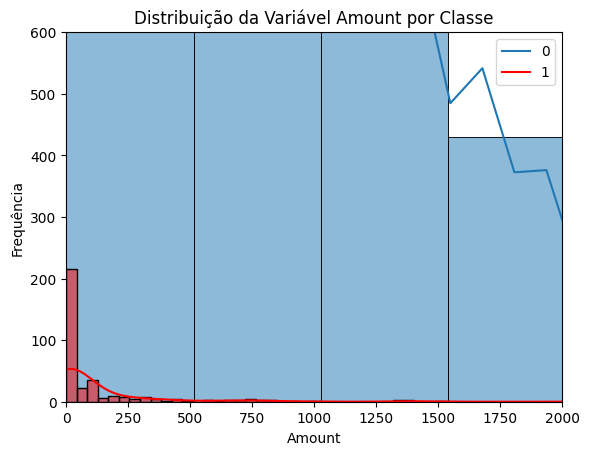

In [12]:
data_train = pd.concat([X_train, y_train], axis=1)
counter = Counter(data_train["Class"])
print('Base de dados original:', counter)

sn.histplot(data=data_train[data_train['Class'] == 0], x="Amount", bins=50, kde=True, stat='count')

sn.histplot(data=data_train[data_train['Class'] == 1], x="Amount", bins=50, color='red', linewidth=1, kde=True, stat='count')

plt.title('Distribuição da Variável Amount por Classe')
plt.legend(["0", "1"])

plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.xlim(0, 2000)
plt.ylim(0, 600)
plt.show()

Subconjunto 10 : 90: Counter({0: 198698, 1: 22055})


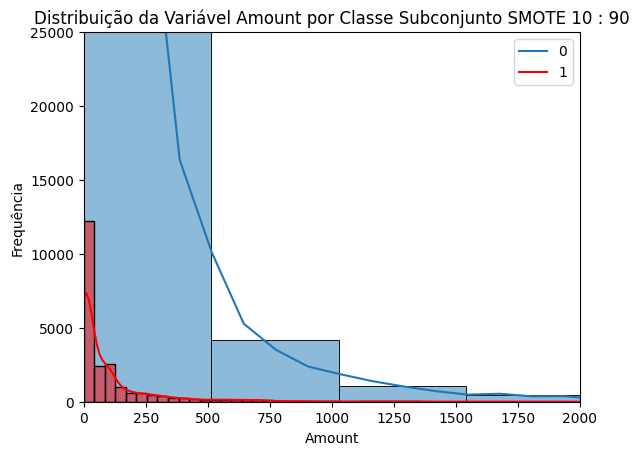

In [13]:
data_train_1090 = pd.concat([X_train_sm_1090, y_train_sm_1090], axis=1)
freq = data_train_1090.groupby(['Amount','Class']).size().reset_index(name='Frequência')
counter = Counter(data_train_1090["Class"])
print('Subconjunto 10 : 90:', counter)

sn.histplot(data=data_train_1090[data_train_1090['Class'] == 0], x="Amount", bins=50, kde=True, stat='count')

sn.histplot(data=data_train_1090[data_train_1090['Class'] == 1], x="Amount", bins=50, color='red', linewidth=1, kde=True, stat='count')

plt.legend(["0", "1"])

plt.title('Distribuição da Variável Amount por Classe Subconjunto SMOTE 10 : 90')
plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.xlim(0, 2000)
plt.ylim(0, 25000)
plt.show()

Subconjunto 50 : 50: Counter({0: 198698, 1: 198698})


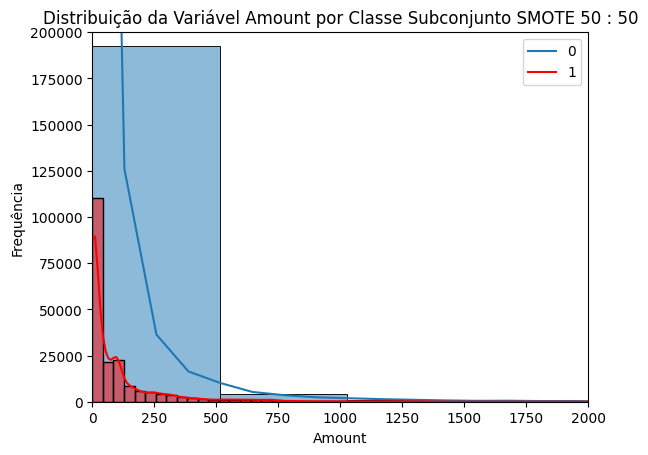

In [14]:
data_train_5050 = pd.concat([X_train_sm_5050, y_train_sm_5050], axis=1)
freq = data_train_5050.groupby(['Amount','Class']).size().reset_index(name='Frequência')

counter = Counter(data_train_5050["Class"])
print('Subconjunto 50 : 50:', counter)

sn.histplot(data=data_train_5050[data_train_5050['Class'] == 0], x="Amount", bins=50, kde=True, stat='count')

sn.histplot(data=data_train_5050[data_train_5050['Class'] == 1], x="Amount", bins=50, color='red',linewidth=1, kde=True, stat='count')

plt.legend(["0", "1"])
plt.title('Distribuição da Variável Amount por Classe Subconjunto SMOTE 50 : 50')
plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.xlim(0, 2000)
plt.ylim(0, 200000)
plt.show()